# Workgroup 5

Authors: Valerie Dube, Erzo Garay, Juan Marcos Guerrero y Matias Villalba

## Replication and Data analysis

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

### 1. Descriptives

#### 1.1. Descriptive table (vale)

In [2]:
# Import data and see first observations
df = pd.read_csv("../../data/processed_esti.csv")
df.head()

,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
0,1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
1,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
2,0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
3,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
4,1,1,1,0,0,1,0,0,0,0,0,1,0,24,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   y                         1739 non-null   int64
 1   w                         1739 non-null   int64
 2   gender_female             1739 non-null   int64
 3   gender_male               1739 non-null   int64
 4   gender_transgender        1739 non-null   int64
 5   ethnicgrp_asian           1739 non-null   int64
 6   ethnicgrp_black           1739 non-null   int64
 7   ethnicgrp_mixed_multiple  1739 non-null   int64
 8   ethnicgrp_other           1739 non-null   int64
 9   ethnicgrp_white           1739 non-null   int64
 10  partners1                 1739 non-null   int64
 11  postlaunch                1739 non-null   int64
 12  msm                       1739 non-null   int64
 13  age                       1739 non-null   int64
 14  imd_decile                1739 non-null 

In [4]:
control = df[df['w'] == 0].drop('y', axis=1)
treatment = df[df['w'] == 1].drop('y', axis=1)

In [5]:
def get_descriptive_stats(group, column):
    if column == 'age':
        count = group[column].count()
    else:
        count = (group[column] == 1).sum()
    mean = group[column].mean()
    std = group[column].std()
    return count, mean, std

variables = df.columns.drop(['w', 'y'])
control_stats = {var: get_descriptive_stats(control, var) for var in variables}
treatment_stats = {var: get_descriptive_stats(treatment, var) for var in variables}

control_df = pd.DataFrame(control_stats, index=['count', 'mean', 'std']).T
treatment_df = pd.DataFrame(treatment_stats, index=['count', 'mean', 'std']).T

control_df.columns = pd.MultiIndex.from_product([['Control'], control_df.columns])
treatment_df.columns = pd.MultiIndex.from_product([['Treatment'], treatment_df.columns])

combined_df = pd.concat([control_df, treatment_df], axis=1)

In [6]:
formatted_table = combined_df[['Control', 'Treatment']].round(2)

print("Table 1: Descriptive Statistics and Balance\n")
print(formatted_table)

Table 1: Descriptive Statistics and Balance

                         Control              Treatment             
                           count   mean   std     count   mean   std
gender_female              475.0   0.58  0.49     541.0   0.59  0.49
gender_male                342.0   0.42  0.49     377.0   0.41  0.49
gender_transgender           1.0   0.00  0.03       3.0   0.00  0.06
ethnicgrp_asian             45.0   0.06  0.23      66.0   0.07  0.26
ethnicgrp_black             76.0   0.09  0.29      74.0   0.08  0.27
ethnicgrp_mixed_multiple    76.0   0.09  0.29      78.0   0.08  0.28
ethnicgrp_other             14.0   0.02  0.13       9.0   0.01  0.10
ethnicgrp_white            607.0   0.74  0.44     694.0   0.75  0.43
partners1                  239.0   0.29  0.46     277.0   0.30  0.46
postlaunch                 387.0   0.47  0.50     512.0   0.56  0.50
msm                        113.0   0.14  0.35     114.0   0.12  0.33
age                        818.0  23.05  3.59     921.0  2

The observations for each variable are generally balanced between the control and treatment groups. Additionally, most participants are white, with an average age of approximately 23. The mean IMD decile scores are around 3.5, indicating that participants in both groups tend to come from more deprived areas.

#### 1.2. Descriptive graphs (vale)

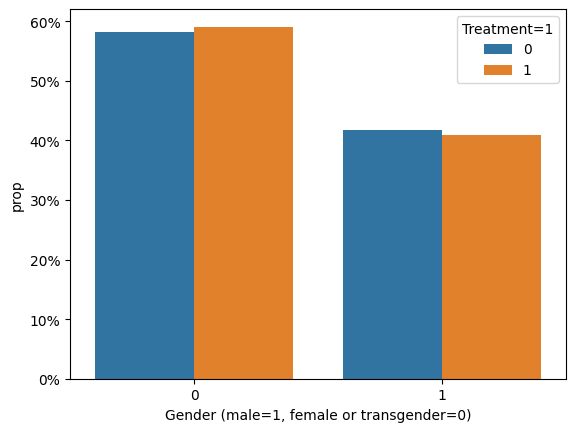

In [7]:
ax = sns.barplot(
    data=df.groupby('w')['gender_male'].value_counts(normalize=True).to_frame().set_axis(['prop'], axis=1),
    x="gender_male",
    y="prop",
    hue="w",
    )

ax.yaxis.set_major_formatter("{x:.0%}")
ax.set_xlabel("Gender (male=1, female or transgender=0)")
ax.legend(title='Treatment=1')

plt.show()

As we saw in section 1.1., there is a similar percentage of males and females participants in each treatment group in the sample. 

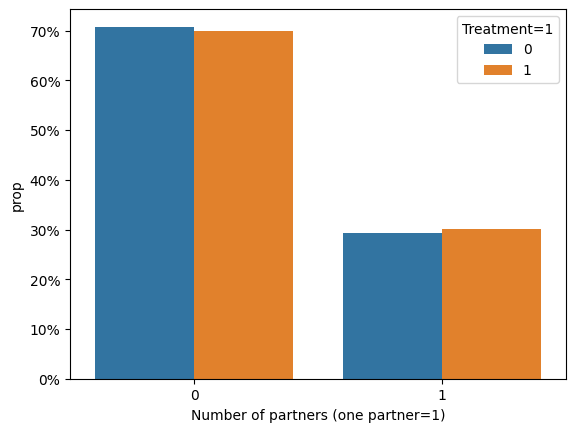

In [8]:
ax = sns.barplot(
    data=df.groupby('w')['partners1'].value_counts(normalize=True).to_frame().set_axis(['prop'], axis=1),
    x="partners1",
    y="prop",
    hue="w",
    )

ax.yaxis.set_major_formatter("{x:.0%}")
ax.set_xlabel("Number of partners (one partner=1)")
ax.legend(title='Treatment=1')

plt.show()

In a similar manner, we note an equal percentage of participants with 2 or more sexual partners as well as those with 1 sexual partner in the last 12 months from the beginning of the study, per treatment or control group.

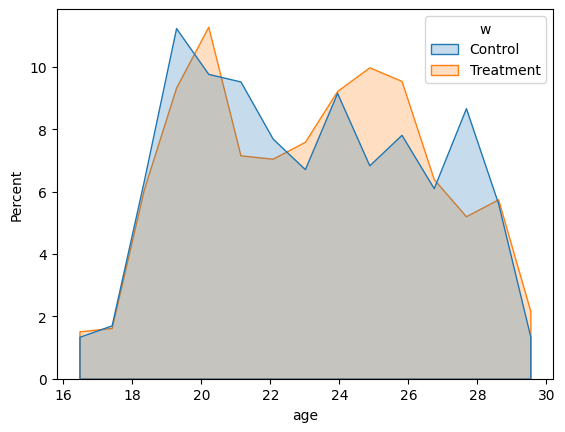

In [9]:
ax = sns.histplot(data=df, x="age", hue="w", element="poly", stat="percent", common_norm=False)

new_labels = ['Control', 'Treatment']  # Replace with your desired labels
for t, l in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)

plt.show()

We can see a higher percentage of participants aged between 23 and 27 in the treatment group. Also, there is a higher perceptange of participants aged between 21 and 22 and 27 and 29 in the control group.

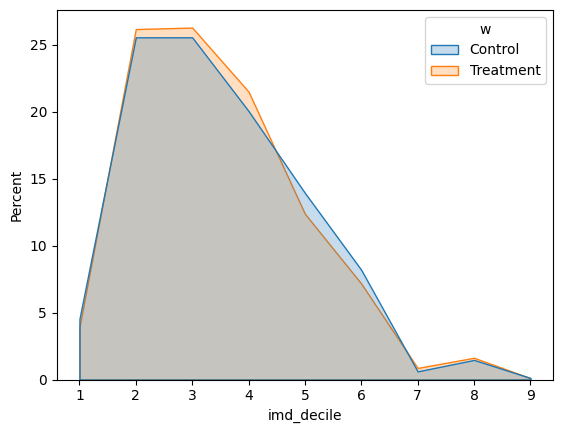

In [10]:
ax = sns.histplot(data=df, x="imd_decile", hue="w", element="poly", discrete=True, stat="percent", common_norm=False)

new_labels = ['Control', 'Treatment']  # Replace with your desired labels
for t, l in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)

plt.show()

In the case of the IMD decile, an index that measures poverty in the UK, we can see the same proportion of participants in each group.

### 2. Linear Regression analysis

#### 2.1. Regression 1: $y = \beta_0 + \beta_1 T + \epsilon$   (Vale)

In [11]:
model_1 = "y ~ w"
est_1 = smf.ols(formula=model_1 , data=df).fit()

print(est_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     144.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.96e-32
Time:                        17:22:11   Log-Likelihood:                -1112.9
No. Observations:                1739   AIC:                             2230.
Df Residuals:                    1737   BIC:                             2241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2115      0.016     13.174      0.0

#### 2.2. Regression 2: $y = \beta_0 + \beta_1 T + \beta_2 X + \epsilon$  (vale)

In [12]:
model_2 = "y ~ w + age + gender_female + ethnicgrp_white + ethnicgrp_black + ethnicgrp_mixed_multiple + partners1 + postlaunch + imd_decile"
est_2 = smf.ols(formula=model_2 , data=df).fit()

print(est_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     24.39
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.11e-39
Time:                        17:22:16   Log-Likelihood:                -1078.4
No. Observations:                1739   AIC:                             2177.
Df Residuals:                    1729   BIC:                             2231.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 2.3. Regression 3: $y = \beta_0 + \beta_1 T + \beta_2 X + \epsilon$ (Double Lasso)

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
import statsmodels.api as sm

X = df[["gender_male", "ethnicgrp_white", "partners1", "age", "imd_decile"]].values
w = df['w'].values
y = df['y'].values

# Fit LassoCV model to find the optimal alpha (lambda)
cv_model3a = LassoCV(alphas=None, cv=10, max_iter=10000).fit(X, w)
cv_model3b = LassoCV(alphas=None, cv=10, max_iter=10000).fit(X, y)

# Fit Lasso model with the optimal alpha
model3a = Lasso(alpha=cv_model3a.alpha_).fit(X, w)
model3b = Lasso(alpha=cv_model3b.alpha_).fit(X, y)

# Calculate residuals
resW = w - model3a.predict(X)
resY = y - model3b.predict(X)

# Create DataFrame for residuals
lassodf = pd.DataFrame({'resY': resY, 'resW': resW})

# Fit linear model on residuals
X_res = sm.add_constant(lassodf['resW'])  # Add constant term for intercept
model3 = sm.OLS(lassodf['resY'], X_res).fit()

# Get coefficient, standard error, and confidence interval for resW
b3 = model3.params['resW']
se3 = model3.bse['resW']
ci3 = model3.conf_int().loc['resW']

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   resY   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.41e-32
Time:                        17:27:22   Log-Likelihood:                -1083.9
No. Observations:                1739   AIC:                             2172.
Df Residuals:                    1737   BIC:                             2183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.188e-17      0.011   2.94e-15      1.0

#### 2.4. Coefficient Comparison

C:\Users\Matias Villalba\AppData\Local\Temp\ipykernel_5624\1377532766.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(model_labels, coefficients, yerr=errors, fmt='o', capsize=5, capthick=2, marker='s', markersize=7, linestyle='None')


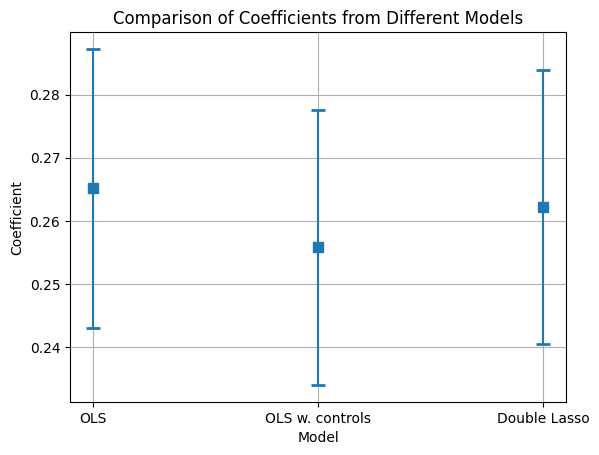

In [20]:
import matplotlib.pyplot as plt

# Assuming model1, model2, model3 are your fitted statsmodels regression models
# Extract the coefficients for resW
b1 = est_1.params['w']
b2 = est_2.params['w']
b3 = model3.params['resW']

# Extract the standard errors for resW
se1 = est_1.bse['w']
se2 = est_2.bse['w']
se3 = model3.bse['resW']

# Labels for the models
model_labels = ['OLS', 'OLS w. controls', 'Double Lasso']

# Coefficients and standard errors
coefficients = [b1, b2, b3]
errors = [se1, se2, se3]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the coefficients with error bars
ax.errorbar(model_labels, coefficients, yerr=errors, fmt='o', capsize=5, capthick=2, marker='s', markersize=7, linestyle='None')

# Add title and labels
ax.set_title('Comparison of Coefficients from Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Coefficient')

# Add grid for better readability
ax.grid(True)

# Show the plot
plt.show()

### 3. Non-Linear Methods DML

#### 3.1.

#### 3.2.

#### 3.3.

#### 3.4.

#### 3.5.

#### 3.6.